In [87]:
# Description: machine learning models for detecting fraudulent credit card transactions with logistic regreesion, decision trees and random forests

In [88]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

In [89]:
# load dataset
dfTrain = pd.read_csv('/content/drive/MyDrive/kaggle/fraudTrain.csv')
dfTest = pd.read_csv('/content/drive/MyDrive/kaggle/fraudTest.csv')

# Data Exploration & Cleaning

In [90]:
# observe train data
dfTrain

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [91]:
# observe test data
dfTest

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [92]:
# check data
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [93]:
# drop unnecessary columns
dfTrain.drop(['Unnamed: 0','trans_date_trans_time','merchant','first','last','street','zip','trans_num','cc_num'],axis=1,inplace=True)
dfTest.drop(['Unnamed: 0','trans_date_trans_time','merchant','first','last','street','zip','trans_num','cc_num'],axis=1,inplace=True)

In [94]:
# observe data metrics for train set
dfTrain.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.603160e+02,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,9.650000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,4.752000e+01,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,8.314000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [95]:
# observe data metrics for test set
dfTest.describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,156.745941,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,1.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,9.630000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,47.290000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,83.010000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,22768.110000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [96]:
# explore data for missing values for train and test
print('Missing values is Train set:\n', dfTrain.isnull().sum())
print('\nMissing Values in Test set:\n', dfTest.isnull().sum())

Missing values is Train set:
 category      0
amt           0
gender        0
city          0
state         0
lat           0
long          0
city_pop      0
job           0
dob           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

Missing Values in Test set:
 category      0
amt           0
gender        0
city          0
state         0
lat           0
long          0
city_pop      0
job           0
dob           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64


In [97]:
# explore data for duplicates
print('Duplicates in Train set:\n', dfTrain.duplicated().sum())
print('\nDuplicates in Test set:\n', dfTest.duplicated().sum())

Duplicates in Train set:
 0

Duplicates in Test set:
 0


In [98]:
# observe datatypes, Train set
dfTrain.dtypes

category       object
amt           float64
gender         object
city           object
state          object
lat           float64
long          float64
city_pop        int64
job            object
dob            object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [99]:
# convert dob (date of birth) into age and create new column
dfTrain['age'] = 2024 - pd.to_datetime(dfTrain['dob']).dt.year
dfTest['age'] = 2024 - pd.to_datetime(dfTest['dob']).dt.year

In [100]:
# observe data types, test set
dfTest.dtypes

category       object
amt           float64
gender         object
city           object
state          object
lat           float64
long          float64
city_pop        int64
job            object
dob            object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
age             int32
dtype: object

In [101]:
# drop dob from dataframes
dfTrain.drop('dob',axis=1,inplace=True)
dfTest.drop('dob',axis=1,inplace=True)

# Data Visualisation

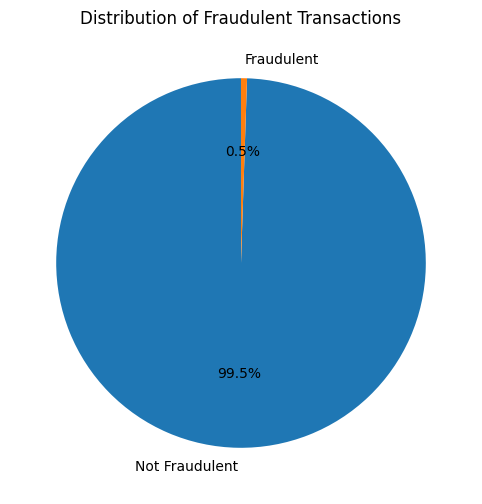

In [102]:
# distribution of fraudulent transactions
plt.figure(figsize=(10, 6))
plt.pie((pd.concat([dfTrain,dfTest])['is_fraud'].value_counts()), labels=['Not Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

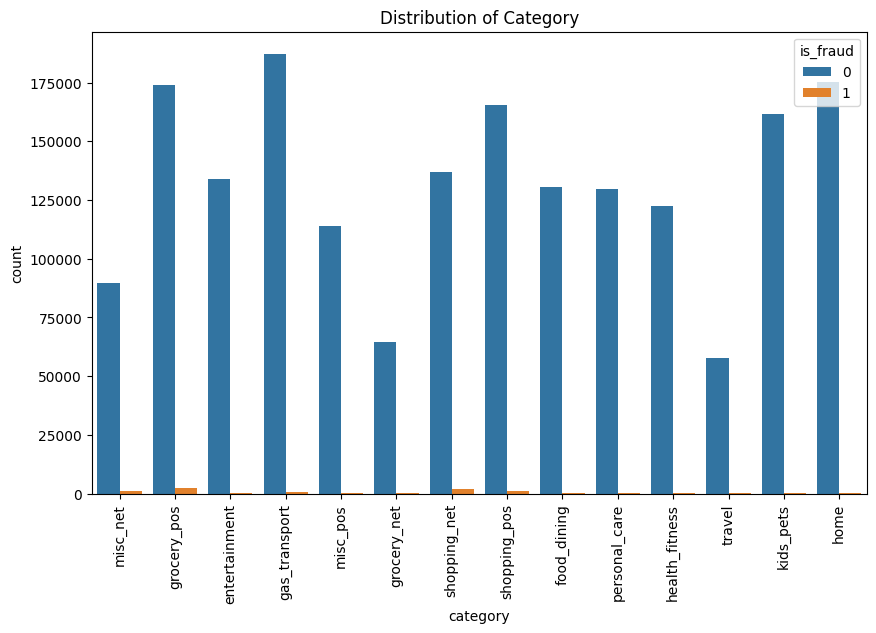

In [103]:
# observe distribution of fraud transactions by category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='is_fraud', data=pd.concat([dfTrain,dfTest]))
plt.title('Distribution of Category')
plt.xticks(rotation=90)
plt.show()

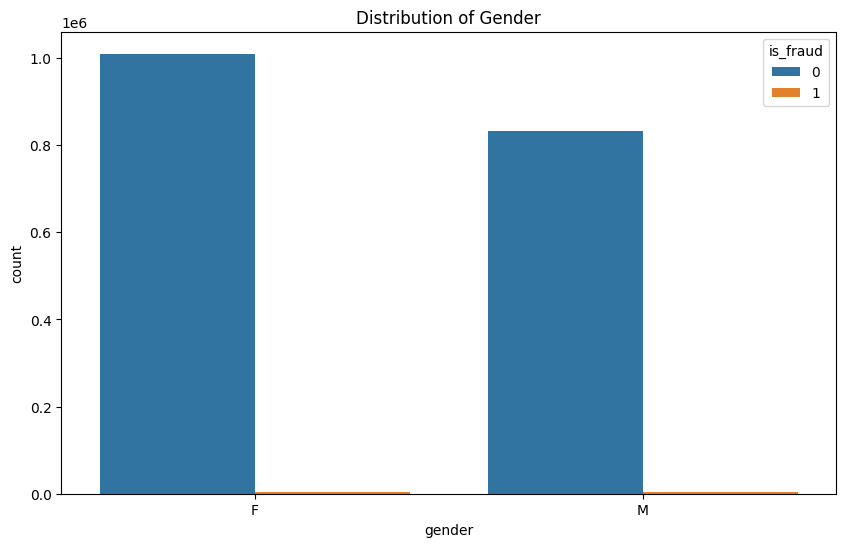

In [104]:
# observe distribution of fraud transactions by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=pd.concat([dfTrain,dfTest]))
plt.title('Distribution of Gender')
plt.show()

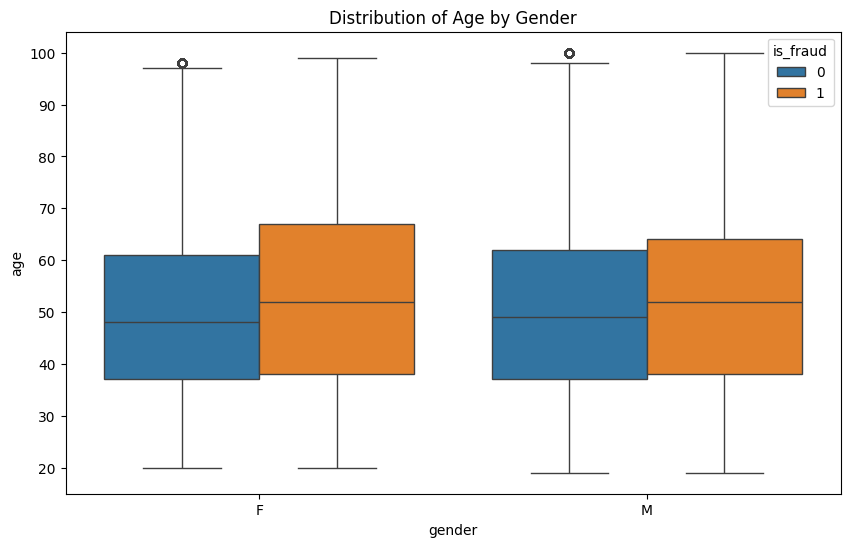

In [105]:
# observe distributions of fraud transactions by age and gender using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=pd.concat([dfTrain,dfTest]))
plt.title('Distribution of Age by Gender')
plt.show()

# Data Preprocessing

In [106]:
# initialise label encoder to object types
le = LabelEncoder()
objList = ['gender','category','city','state','job']

for col in objList:
  dfTrain[col] = le.fit_transform(dfTrain[col])
  dfTest[col] = le.fit_transform(dfTest[col])

In [107]:
# feature scaling
sc = StandardScaler()
numList = ['amt','lat','long','city_pop','unix_time','merch_lat','merch_long','age']

for col in numList:
  dfTrain[col] = sc.fit_transform(dfTrain[[col]])
  dfTest[col] = sc.fit_transform(dfTest[[col]])

In [108]:
# observe new data types
dfTrain.dtypes

category        int64
amt           float64
gender          int64
city            int64
state           int64
lat           float64
long          float64
city_pop      float64
job             int64
unix_time     float64
merch_lat     float64
merch_long    float64
is_fraud        int64
age           float64
dtype: object

In [109]:
dfTest.dtypes

category        int64
amt           float64
gender          int64
city            int64
state           int64
lat           float64
long          float64
city_pop      float64
job             int64
unix_time     float64
merch_lat     float64
merch_long    float64
is_fraud        int64
age           float64
dtype: object

In [110]:
# store independant variables in a variables X_train and X_test
X_train = dfTrain.drop('is_fraud',axis=1)
X_test = dfTest.drop('is_fraud',axis=1)

# store dependent variables in variables called Y_train and Y_test
Y_train = dfTrain['is_fraud']
Y_test = dfTest['is_fraud']

In [58]:
# observe shapes
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1296675, 13)
(555719, 13)
(1296675,)
(555719,)


# Logistic Regression

In [59]:
# create machine learning model for Logistic Regression
lr = LogisticRegression().fit(X_train,Y_train)

In [60]:
# observe model score
lr.score(X_train,Y_train)

0.9936691923573756

In [61]:
# observe model predictions
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
# observe classification report
print(classification_report(Y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [63]:
# observe accuracy score in percentage form
accuracy_score(Y_test, lr.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, lr.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 99.55%


In [64]:
# feature importance (using coeffecients)
lr.coef_[0]
lr_features = X_test.columns

# data frame for features and importance scores
lr_feature_importance = pd.DataFrame({'Feature': lr_features, 'Coefficients': lr.coef_[0]})
lr_feature_importance.sort_values(by='Coefficients', ascending=False)
lr_feature_importance

,Feature,Coefficients
0,category,-0.022910
1,amt,0.444824
2,gender,-1.078971
3,city,-0.000530
4,state,-0.010960
5,lat,0.064919
6,long,0.006112
7,city_pop,-0.125285
8,job,-0.001212
9,unix_time,-0.078194


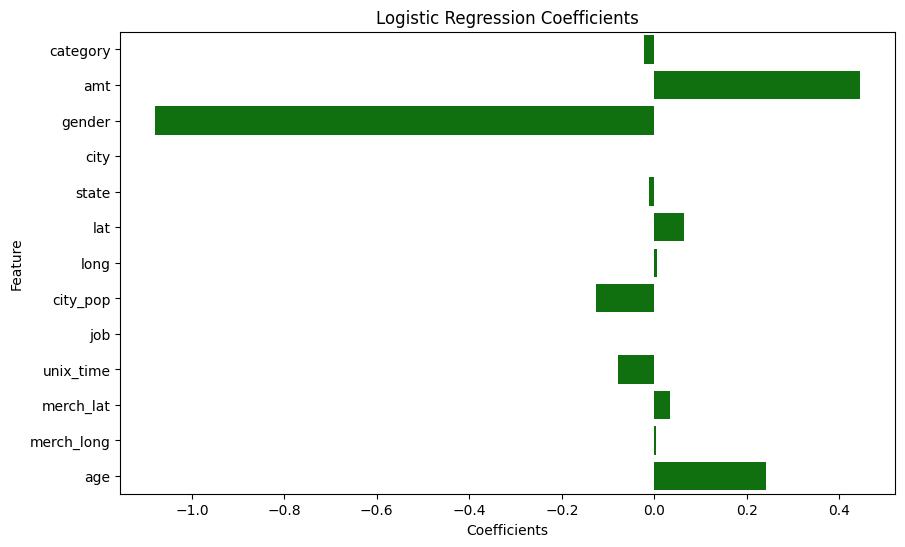

In [65]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Feature', data=lr_feature_importance, color='green')
plt.title('Logistic Regression Coefficients')
plt.show()

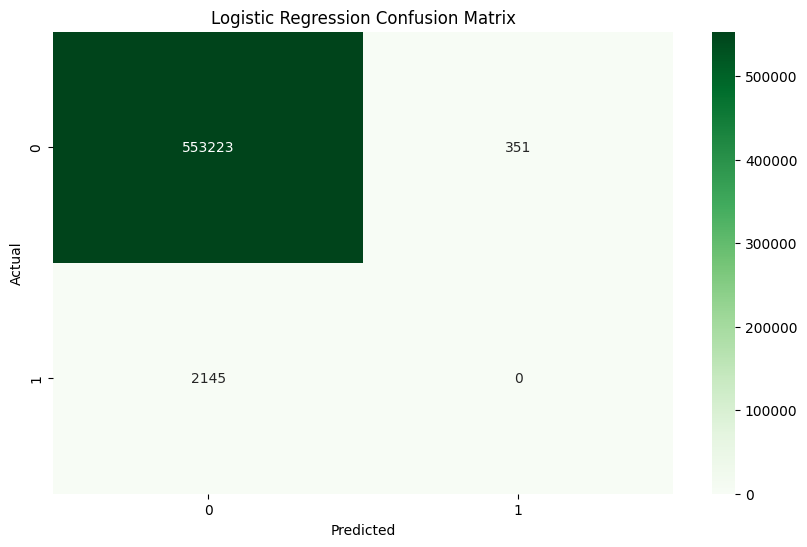

In [66]:
# plot confusion matrix for logistic Regression
confusion_matrix(Y_test, lr.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, lr.predict(X_test)), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.83


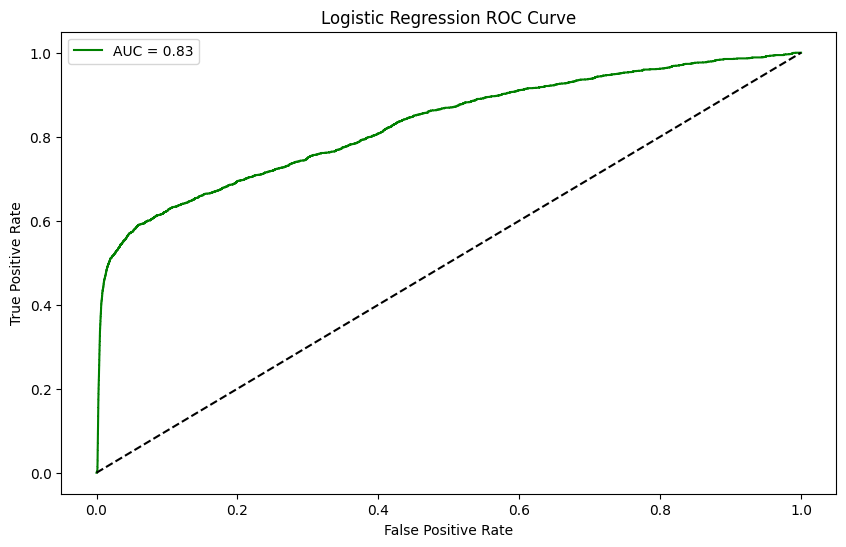

In [67]:
# ROC curve and AUC score
lr_y_proba = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, lr_y_proba)
print(f'AUC: {auc(lr_fpr, lr_tpr):.2f}')

plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f'AUC = {auc(lr_fpr, lr_tpr):.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Decision Trees

In [68]:
# create machine learning model for Decision Trees
dt = DecisionTreeClassifier(random_state=42).fit(X_train,Y_train)

In [69]:
# observe model score
dt.score(X_train,Y_train)

1.0

In [70]:
# observe model predictions
dt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
# observe classification report
print(classification_report(Y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.56      0.60      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.80      0.79    555719
weighted avg       1.00      1.00      1.00    555719



In [72]:
# observe accuracy score in percentage form
accuracy_score(Y_test, dt.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, dt.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 99.66%


In [73]:
# feature importance
dt.feature_importances_
dt_features = X_test.columns

# data frame for features and importance scores
dt_feature_importance = pd.DataFrame({'Feature': dt_features, 'Importance': dt.feature_importances_})
dt_feature_importance.sort_values(by='Importance', ascending=False)
dt_feature_importance

,Feature,Importance
0,category,0.328828
1,amt,0.319022
2,gender,0.013325
3,city,0.019177
4,state,0.012875
5,lat,0.016770
6,long,0.016395
7,city_pop,0.039369
8,job,0.025230
9,unix_time,0.074368


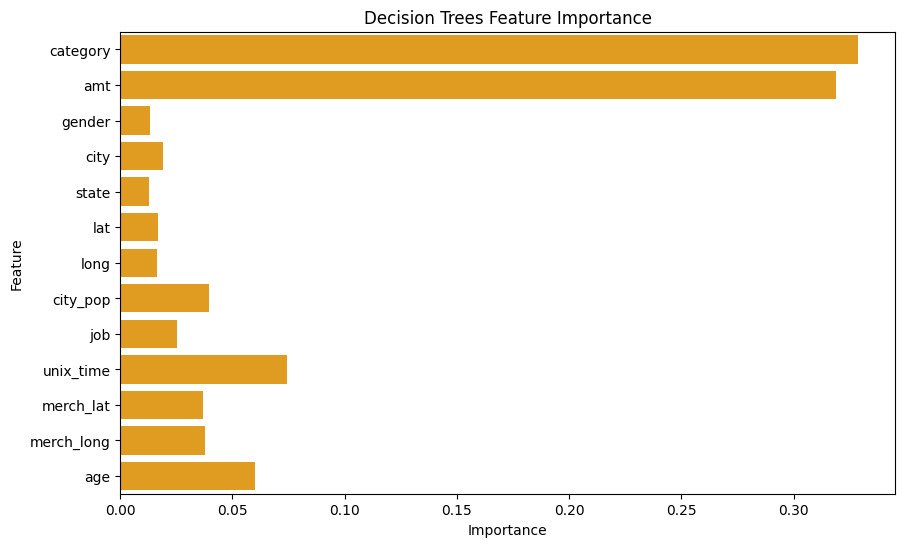

In [74]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance, color='orange')
plt.title('Decision Trees Feature Importance')
plt.show()

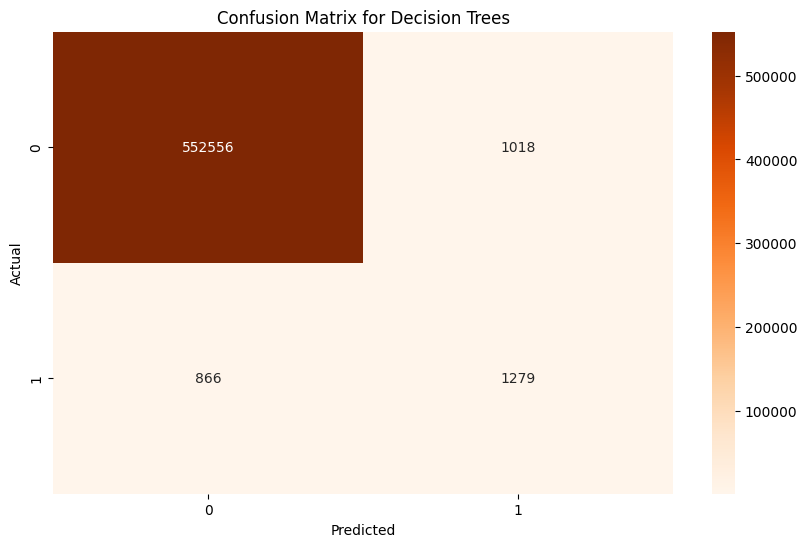

In [75]:
# plot confusion matrix
confusion_matrix(Y_test, dt.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, dt.predict(X_test)), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix for Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.80


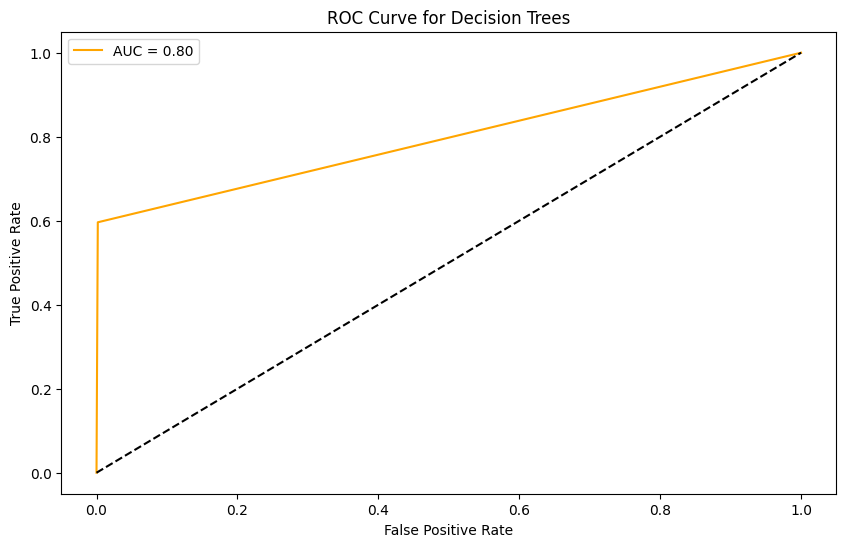

In [76]:
# ROC curve and AUC score
dt_y_proba = dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, dt_thresholds = roc_curve(Y_test, dt_y_proba)
print(f'AUC: {auc(dt_fpr, dt_tpr):.2f}')

plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label=f'AUC = {auc(dt_fpr, dt_tpr):.2f}', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Trees')
plt.legend()
plt.show()

# Random Forest Classifier

In [77]:
# create machine learning model for Logistic Regression
rfc = RandomForestClassifier(n_estimators=50).fit(X_train,Y_train)

In [78]:
# observe model score
rfc.score(X_train,Y_train)

0.9999814911215223

In [79]:
# observe model predictions
rfc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
# observe classification report
print(classification_report(Y_test,rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.52      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.76      0.82    555719
weighted avg       1.00      1.00      1.00    555719



In [81]:
# observe accuracy score in percentage form
accuracy_score(Y_test, rfc.predict(X_test))
print(f'Accuracy score percentage: {round(accuracy_score(Y_test, rfc.predict(X_test)) * 100, 2)}%')

Accuracy score percentage: 99.77%


In [82]:
# feature importance
rfc.feature_importances_
rfc_features = X_test.columns

# dataframe for features and importance scores
rfc_feature_importance = pd.DataFrame({'Feature': rfc_features, 'Importance': rfc.feature_importances_})
rfc_feature_importance.sort_values(by='Importance', ascending=False)
rfc_feature_importance

,Feature,Importance
0,category,0.170755
1,amt,0.417222
2,gender,0.010778
3,city,0.027457
4,state,0.017230
5,lat,0.025881
6,long,0.025696
7,city_pop,0.041086
8,job,0.028351
9,unix_time,0.078612


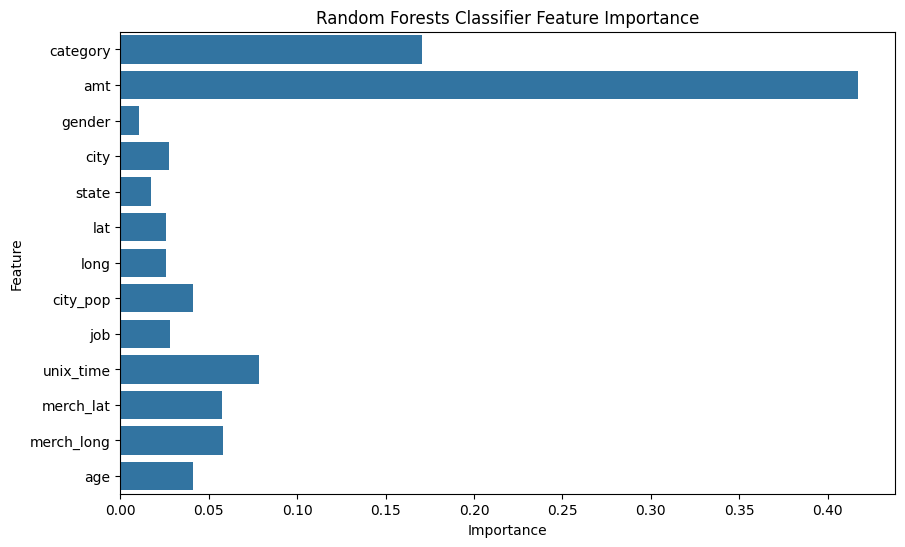

In [83]:
# feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rfc_feature_importance)
plt.title('Random Forests Classifier Feature Importance')
plt.show()

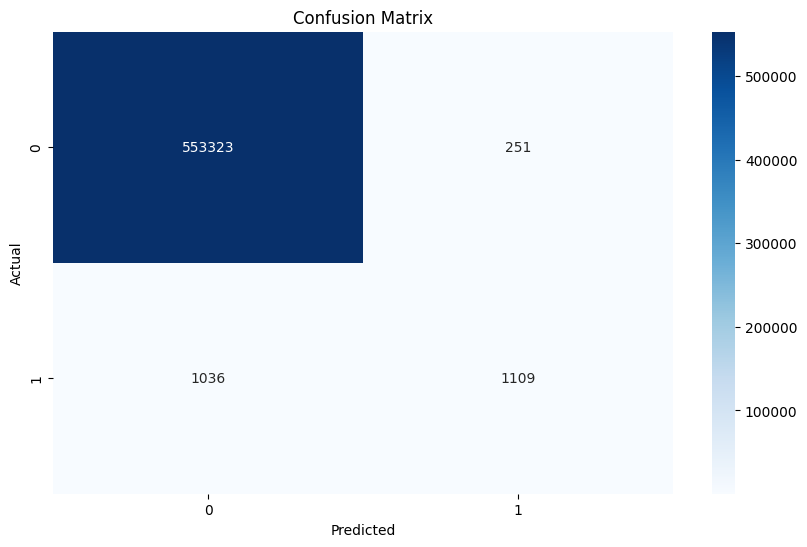

In [84]:
# plot confusion matrix
confusion_matrix(Y_test, rfc.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, rfc.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.94


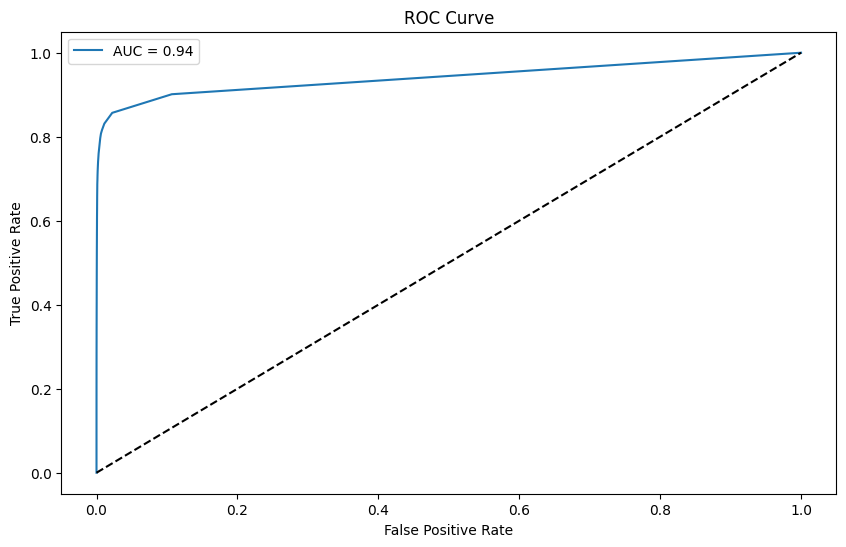

In [85]:
# ROC curve and AUC score
rfc_y_proba = rfc.predict_proba(X_test)[:, 1]
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(Y_test, rfc_y_proba)
print(f'AUC: {auc(rfc_fpr, rfc_tpr):.2f}')

plt.figure(figsize=(10, 6))
plt.plot(rfc_fpr, rfc_tpr, label=f'AUC = {auc(rfc_fpr, rfc_tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Results

In [86]:
# create a dataframe to observe models and performance metrics
results = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest Classifier'],
                        'Accuracy': [accuracy_score(Y_test, lr.predict(X_test)) * 100, accuracy_score(Y_test, dt.predict(X_test)) * 100, accuracy_score(Y_test, rfc.predict(X_test)) * 100],
                        'AUC': [auc(lr_fpr, lr_tpr), auc(dt_fpr, dt_tpr), auc(rfc_fpr, rfc_tpr)],
                        'roc_auc': [roc_auc_score(Y_test, lr.predict(X_test)), roc_auc_score(Y_test, dt.predict(X_test)), roc_auc_score(Y_test, rfc.predict(X_test))],
                        'f1_score': [f1_score(Y_test, lr.predict(X_test)), f1_score(Y_test, dt.predict(X_test)), f1_score(Y_test, rfc.predict(X_test))],
                        'precision_score': [precision_score(Y_test, lr.predict(X_test)), precision_score(Y_test, dt.predict(X_test)), precision_score(Y_test, rfc.predict(X_test))],
                        'recall_score': [recall_score(Y_test, lr.predict(X_test)), recall_score(Y_test, dt.predict(X_test)), recall_score(Y_test, rfc.predict(X_test))]
                        })
results

,Model,Accuracy,AUC,roc_auc,f1_score,precision_score,recall_score
0,Logistic Regression,99.550852,0.827319,0.499683,0.000000,0.000000,0.000000
1,Decision Trees,99.660980,0.797216,0.797216,0.575867,0.556813,0.596270
2,Random Forest Classifier,99.768408,0.941268,0.758281,0.632810,0.815441,0.517016
